<a href="https://colab.research.google.com/github/voquangtuong/AAA_drought_prediction/blob/main/Runtheory_dataframe_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code write follow the definition of arcticle

Kwak, J., Kim, D., Kim, S., Singh, V. P., & Kim, H. (2014). Hydrological Drought Analysis in Namhan River Basin, Korea. Journal of Hydrologic Engineering, 19(8), 05014001. doi:doi:10.1061/(ASCE)HE.1943-5584.0000889

![runtheory](https://user-images.githubusercontent.com/72409146/123530820-c5688080-d739-11eb-9a39-55c5560205f2.png)

## Event at the last 

In [10]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [11]:
# connect GGD
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df0=pd.read_csv('/content/drive/MyDrive/out_tabs_spi/mean.csv',date_parser='Date')
df=df0.iloc[7:,2:] # de tien tinh toan tinh tu  thang 1/2001-1/2020. Tong cong 20 nam
df

,Date,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
7,2001-01-01 00:00:00,-1.434162,-0.051318,0.299966,0.171857,-1.303176,-0.916315,-0.855861,-1.682586,-0.238579,0.114905,-1.426734,-1.666011,0.758427,-0.551049,-1.322440,1.384493,0.227158,-0.745841,-0.310466,0.659012,-1.483398,-1.158853,-1.077708,-1.342413,0.434974,0.558012,0.734923,1.444584
8,2001-02-01 00:00:00,-0.806254,-0.902185,-0.036096,-0.094348,-1.414290,-0.997743,-0.698510,-1.669775,0.148708,0.283239,-0.715970,-1.440380,-0.023921,-0.420831,-1.071340,1.284027,0.620781,-0.353000,0.130517,0.979333,-1.072869,-0.730091,-1.255976,-0.991996,0.309780,0.569683,0.981690,1.413195
9,2001-03-01 00:00:00,-0.016928,-0.735966,-0.250453,-0.077608,1.094390,1.192857,0.873696,0.620482,1.637079,1.920616,1.142277,0.151853,0.178621,0.671020,-0.115328,0.973653,1.688109,1.675144,1.903762,1.394022,0.762919,0.807000,0.885888,0.217999,0.859434,0.641611,1.001700,1.037216
10,2001-04-01 00:00:00,-0.488521,-0.740661,-0.060933,-0.118317,0.288618,0.434680,0.236968,-0.265821,0.759616,1.196911,0.105678,-0.385683,-0.542868,-0.045336,-0.256328,0.363288,1.085941,0.667957,0.976667,1.328572,-0.043680,0.196531,0.682183,-0.445725,0.378522,0.512237,0.775955,0.546794
11,2001-05-01 00:00:00,1.655984,0.403015,-0.015142,0.228403,1.124861,1.494099,1.773163,0.802099,0.588730,1.098304,0.219071,0.442929,0.811368,0.724497,0.830510,0.142921,1.106447,1.112907,1.093203,1.052904,1.655202,1.899664,1.163704,1.829802,1.102848,0.238994,0.353527,0.331576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-09-01 00:00:00,2.273945,1.163298,1.835205,1.431248,-0.188043,-0.727746,-0.173592,0.397836,-0.440697,-1.020637,-0.279673,-0.624557,-2.215236,-1.661107,-1.496513,-0.472503,-1.499266,-1.037716,-1.659892,-0.275746,-0.213422,-0.498122,-0.314048,1.725294,-1.436825,-0.713265,-1.130214,-0.907651
244,2020-10-01 00:00:00,1.439976,0.839470,0.879525,0.150517,0.587870,0.089435,0.371826,0.641649,0.595144,1.214857,0.967764,0.573861,1.018068,1.018807,0.333766,0.151109,-0.273263,0.955170,0.208381,1.519176,-0.159537,-0.055275,1.087757,0.819830,1.351469,1.263840,-0.245484,0.046191
245,2020-11-01 00:00:00,-0.105128,0.244773,1.104993,0.902168,-0.296949,-0.943909,-0.692703,0.009990,0.865219,1.373159,1.125477,0.447224,1.371301,1.354355,0.012216,0.274287,-0.035108,0.836203,0.301870,1.396385,-0.949010,-0.987376,0.270211,-0.666386,1.175186,0.318354,-0.008829,0.170346
246,2020-12-01 00:00:00,-0.873628,-0.245479,-0.919188,-0.636713,-0.624943,-1.076844,-1.322484,0.014922,1.315344,1.938344,1.194813,0.788703,2.094967,1.963923,0.864879,0.670190,0.692906,1.318064,1.147671,1.060005,-1.218062,-1.298088,0.067354,-1.366834,1.595371,0.632540,0.388338,0.709813


In [13]:
# Reset index theo thu tu tu 0
df1=df.reset_index(drop=False, inplace=False) # index cu van con, khong co thay the
df1


,index,Date,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,7,2001-01-01 00:00:00,-1.434162,-0.051318,0.299966,0.171857,-1.303176,-0.916315,-0.855861,-1.682586,-0.238579,0.114905,-1.426734,-1.666011,0.758427,-0.551049,-1.322440,1.384493,0.227158,-0.745841,-0.310466,0.659012,-1.483398,-1.158853,-1.077708,-1.342413,0.434974,0.558012,0.734923,1.444584
1,8,2001-02-01 00:00:00,-0.806254,-0.902185,-0.036096,-0.094348,-1.414290,-0.997743,-0.698510,-1.669775,0.148708,0.283239,-0.715970,-1.440380,-0.023921,-0.420831,-1.071340,1.284027,0.620781,-0.353000,0.130517,0.979333,-1.072869,-0.730091,-1.255976,-0.991996,0.309780,0.569683,0.981690,1.413195
2,9,2001-03-01 00:00:00,-0.016928,-0.735966,-0.250453,-0.077608,1.094390,1.192857,0.873696,0.620482,1.637079,1.920616,1.142277,0.151853,0.178621,0.671020,-0.115328,0.973653,1.688109,1.675144,1.903762,1.394022,0.762919,0.807000,0.885888,0.217999,0.859434,0.641611,1.001700,1.037216
3,10,2001-04-01 00:00:00,-0.488521,-0.740661,-0.060933,-0.118317,0.288618,0.434680,0.236968,-0.265821,0.759616,1.196911,0.105678,-0.385683,-0.542868,-0.045336,-0.256328,0.363288,1.085941,0.667957,0.976667,1.328572,-0.043680,0.196531,0.682183,-0.445725,0.378522,0.512237,0.775955,0.546794
4,11,2001-05-01 00:00:00,1.655984,0.403015,-0.015142,0.228403,1.124861,1.494099,1.773163,0.802099,0.588730,1.098304,0.219071,0.442929,0.811368,0.724497,0.830510,0.142921,1.106447,1.112907,1.093203,1.052904,1.655202,1.899664,1.163704,1.829802,1.102848,0.238994,0.353527,0.331576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,243,2020-09-01 00:00:00,2.273945,1.163298,1.835205,1.431248,-0.188043,-0.727746,-0.173592,0.397836,-0.440697,-1.020637,-0.279673,-0.624557,-2.215236,-1.661107,-1.496513,-0.472503,-1.499266,-1.037716,-1.659892,-0.275746,-0.213422,-0.498122,-0.314048,1.725294,-1.436825,-0.713265,-1.130214,-0.907651
237,244,2020-10-01 00:00:00,1.439976,0.839470,0.879525,0.150517,0.587870,0.089435,0.371826,0.641649,0.595144,1.214857,0.967764,0.573861,1.018068,1.018807,0.333766,0.151109,-0.273263,0.955170,0.208381,1.519176,-0.159537,-0.055275,1.087757,0.819830,1.351469,1.263840,-0.245484,0.046191
238,245,2020-11-01 00:00:00,-0.105128,0.244773,1.104993,0.902168,-0.296949,-0.943909,-0.692703,0.009990,0.865219,1.373159,1.125477,0.447224,1.371301,1.354355,0.012216,0.274287,-0.035108,0.836203,0.301870,1.396385,-0.949010,-0.987376,0.270211,-0.666386,1.175186,0.318354,-0.008829,0.170346
239,246,2020-12-01 00:00:00,-0.873628,-0.245479,-0.919188,-0.636713,-0.624943,-1.076844,-1.322484,0.014922,1.315344,1.938344,1.194813,0.788703,2.094967,1.963923,0.864879,0.670190,0.692906,1.318064,1.147671,1.060005,-1.218062,-1.298088,0.067354,-1.366834,1.595371,0.632540,0.388338,0.709813


In [14]:

# df2 chi chua du lieu can tinh tu 2001-2020, 240 x28
df2=df1.iloc[:-1,2:]
df2


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,-1.434162,-0.051318,0.299966,0.171857,-1.303176,-0.916315,-0.855861,-1.682586,-0.238579,0.114905,-1.426734,-1.666011,0.758427,-0.551049,-1.322440,1.384493,0.227158,-0.745841,-0.310466,0.659012,-1.483398,-1.158853,-1.077708,-1.342413,0.434974,0.558012,0.734923,1.444584
1,-0.806254,-0.902185,-0.036096,-0.094348,-1.414290,-0.997743,-0.698510,-1.669775,0.148708,0.283239,-0.715970,-1.440380,-0.023921,-0.420831,-1.071340,1.284027,0.620781,-0.353000,0.130517,0.979333,-1.072869,-0.730091,-1.255976,-0.991996,0.309780,0.569683,0.981690,1.413195
2,-0.016928,-0.735966,-0.250453,-0.077608,1.094390,1.192857,0.873696,0.620482,1.637079,1.920616,1.142277,0.151853,0.178621,0.671020,-0.115328,0.973653,1.688109,1.675144,1.903762,1.394022,0.762919,0.807000,0.885888,0.217999,0.859434,0.641611,1.001700,1.037216
3,-0.488521,-0.740661,-0.060933,-0.118317,0.288618,0.434680,0.236968,-0.265821,0.759616,1.196911,0.105678,-0.385683,-0.542868,-0.045336,-0.256328,0.363288,1.085941,0.667957,0.976667,1.328572,-0.043680,0.196531,0.682183,-0.445725,0.378522,0.512237,0.775955,0.546794
4,1.655984,0.403015,-0.015142,0.228403,1.124861,1.494099,1.773163,0.802099,0.588730,1.098304,0.219071,0.442929,0.811368,0.724497,0.830510,0.142921,1.106447,1.112907,1.093203,1.052904,1.655202,1.899664,1.163704,1.829802,1.102848,0.238994,0.353527,0.331576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2.011454,0.584514,1.867437,1.382221,-0.511570,-0.697098,-0.248749,0.415953,-0.364173,-1.181948,-0.543158,-0.525644,-2.415831,-1.850954,-1.674675,0.314176,-1.250820,-0.809160,-1.378857,-0.357986,-0.292964,-0.656602,-0.861787,1.326263,-1.854098,-0.067104,-0.635925,0.083146
236,2.273945,1.163298,1.835205,1.431248,-0.188043,-0.727746,-0.173592,0.397836,-0.440697,-1.020637,-0.279673,-0.624557,-2.215236,-1.661107,-1.496513,-0.472503,-1.499266,-1.037716,-1.659892,-0.275746,-0.213422,-0.498122,-0.314048,1.725294,-1.436825,-0.713265,-1.130214,-0.907651
237,1.439976,0.839470,0.879525,0.150517,0.587870,0.089435,0.371826,0.641649,0.595144,1.214857,0.967764,0.573861,1.018068,1.018807,0.333766,0.151109,-0.273263,0.955170,0.208381,1.519176,-0.159537,-0.055275,1.087757,0.819830,1.351469,1.263840,-0.245484,0.046191
238,-0.105128,0.244773,1.104993,0.902168,-0.296949,-0.943909,-0.692703,0.009990,0.865219,1.373159,1.125477,0.447224,1.371301,1.354355,0.012216,0.274287,-0.035108,0.836203,0.301870,1.396385,-0.949010,-0.987376,0.270211,-0.666386,1.175186,0.318354,-0.008829,0.170346


In [15]:

# loai bo nhung cot khong thoa dieu kien
# """
# vi du mau
#  # processing: drop columns with no. of NaN > 3
# # ====================================
# df.drop(df.columns[df.apply(lambda col: col.isnull().sum() > 3)], axis=1)"""

threshold=-2
df3=df2.drop(df2.columns[df2.apply(lambda col:col.min() > threshold)], axis=1)
df3

# read data
# x=np.array([-2, 1, 2, 1,0, -1, -2,-3,-2,-1,0,1,2,3,2,1,0,-1,-2,-3,-2,-1,0,1,2,3,2,-2,-3])
list_drought_all=list()
for n_col in range(df3.shape[1]):
  x=np.array(df3.iloc[:,n_col].values)

  # Data processing
  df=pd.DataFrame(x,columns=['x'])
  # df.plot(kind='bar')
  ########
  # threshold=-1
  start_point=[]
  end_point=[]
  n_dd=[]
  n_ss=[]
  # vi tri hang nho hon gia tri nguong
  n_index=df[df["x"]<threshold].index.values
  n_index
  # tim vi tri bat dau
  start_point.append(n_index[0]) # gia tri dau tien luon phai them vao
  # cac gia tri bat dau o giua duoc xac dinh khi no tru cho gia tri truoc lon hon 1
  # noi cach khac no khong lien tuc
  for i in range(len(n_index)-1):
    if n_index[i+1]-n_index[i] >1:
      # print(n_index[i])
      start_point.append(n_index[i+1])
  # tim end_point. end_point cung giong nhu start point

  
  # tim duration cho tung start point. Tinh bat dau bang start point cho den khi n_index
  # tang len khac 1, nghia la no ko con lien tuc nua
  for i in range(len(n_index)-1):
    if n_index[i]-n_index[i+1] <-1:
      # print(n_index[i])
      end_point.append(n_index[i])
  # luon them diem cuoi cua n_index la end_point
  end_point.append(n_index[-1])
  n_dd=np.array(end_point)-np.array(start_point)+1
  n_dd
  # severity la tong gia tri tu bat dau 1 den ket thuc 1
  n_se=[]
  for i in range(len(start_point)):
    n_se.append(df['x'][start_point[i]:end_point[i]+1].sum())
    
  # inteval la khoang cach tu bat dau tran han nay den bat dau tran han khac.
  # no it hon n_begin mot gia tri
  n_interval=[]
  n_interval.append(0)
  for i in range(len(start_point)-1):
    n_interval.append(start_point[i+1]-start_point[i]+1)

  # Duration
  n_du=[]
  for i in range(len(start_point)):
    n_du.append(end_point[i]-start_point[i]+1)
  # Intensity
  n_intensity=[]
  for i in range(len(start_point)):
    n_intensity.append(n_se[i]/n_du[i])

  # xuat ket qua ra dang csv
  df_drought=pd.DataFrame(columns=['begin','end','dd','ss','intens','inter'])
  df_drought['begin']=start_point
  df_drought['end']=end_point
  df_drought['dd']=n_du
  df_drought['ss']=n_se
  df_drought['intens']=n_intensity
  df_drought['inter']=n_interval
  print('ket qua cho zone '+ str(df3.columns.to_list()[n_col]))
  print(df_drought)
  list_drought_all.append(df_drought)

  # # plot
  # df.plot(kind='bar')
  # plt.plot(start_point,df["x"][start_point],"x",color='red')
  # plt.plot(end_point,df["x"][end_point],"s",color='black')
  # # to mau cho tran han cuc doan
  # # ve mua mua
  # # index_begin=5 # June begin rain season Yang et al. 2019
  # # index_end=10 # September end rain season Yang et al. 2019
  # # np_arr_start=np.arange(index_begin,len(data1),12)
  # # np_arr_end=np.arange(index_end,len(data1),12)
  # # for k in range(len(np_arr_end)):
  # #         dry=ax1.axvspan(np_arr_start[k]-0.5, np_arr_end[k]+0.5, alpha=0.2, color='green')
  # #         ax2.axvspan(np_arr_start[k]-0.5, np_arr_end[k]+0.5, alpha=0.2, color='green')
  # for i in range(len(start_point)):
  #   plt.axvspan(start_point[i]-0.5,end_point[i]+0.5,alpha=0.5, color='pink')

ket qua cho zone 1
   begin  end  dd        ss    intens  inter
0    220  222   3 -7.218611 -2.406204      0
ket qua cho zone 3
   begin  end  dd        ss    intens  inter
0     21   21   1 -2.185174 -2.185174      0
1    110  111   2 -4.296156 -2.148078     90
ket qua cho zone 4
   begin  end  dd        ss    intens  inter
0     68   68   1 -2.157696 -2.157696      0
ket qua cho zone 5
   begin  end  dd        ss    intens  inter
0    173  173   1 -2.327839 -2.327839      0
1    226  226   1 -2.680494 -2.680494     54
2    229  229   1 -2.015956 -2.015956      4
ket qua cho zone 6
   begin  end  dd        ss    intens  inter
0     79   79   1 -2.068624 -2.068624      0
1    105  105   1 -2.206620 -2.206620     27
2    219  219   1 -2.035459 -2.035459    115
3    221  221   1 -2.479689 -2.479689      3
4    226  226   1 -2.524501 -2.524501      6
ket qua cho zone 7
   begin  end  dd        ss    intens  inter
0    219  221   3 -7.258014 -2.419338      0
1    226  226   1 -2.512177 -2.

# Thong ke
* so tran han
* thoi gian keo dai
* muc do han
* cuong do han
* thoi gian giua 2 lan han

In [16]:
# thoi gian bat dau
begin=[]
for i in  range(len(list_drought_all)):

  begin.append(list_drought_all[i].begin.values)
begin
# lenh concatenate convert array to vector
begin_vector=np.concatenate(begin)
np.array(begin_vector)
import collections

# p = int(input("Length of matrix: "))
# m = np.random.randint(0, 9, (p, p))
# print(m)
begin_count=collections.Counter(begin_vector)
print(collections.Counter(begin_vector))
print(df1['Date'][173])
print(df1['Date'][226])

begin_df = pd.DataFrame.from_dict(begin_count, orient='index').reset_index()
begin_df
# sort df theo cot index
begin_df1=begin_df.sort_values('index').reset_index()
begin_df1['index'].values
begin_date=[]
for i in begin_df1['index'].values:
  print(df1['Date'][i])
  begin_date.append(df1['Date'][i])
begin_date
begin_df1['Date']=begin_date
begin_df1.index=begin_df1['Date']


Counter({173: 7, 226: 7, 183: 6, 219: 5, 158: 4, 46: 4, 116: 4, 229: 3, 105: 3, 47: 3, 49: 3, 234: 2, 230: 2, 113: 2, 220: 1, 21: 1, 110: 1, 68: 1, 79: 1, 221: 1, 114: 1, 45: 1, 50: 1, 120: 1, 214: 1, 233: 1, 140: 1, 222: 1, 104: 1, 112: 1, 48: 1})
2015-06-01 00:00:00
2019-11-01 00:00:00
2002-10-01 00:00:00
2004-10-01 00:00:00
2004-11-01 00:00:00
2004-12-01 00:00:00
2005-01-01 00:00:00
2005-02-01 00:00:00
2005-03-01 00:00:00
2006-09-01 00:00:00
2007-08-01 00:00:00
2009-09-01 00:00:00
2009-10-01 00:00:00
2010-03-01 00:00:00
2010-05-01 00:00:00
2010-06-01 00:00:00
2010-07-01 00:00:00
2010-09-01 00:00:00
2011-01-01 00:00:00
2012-09-01 00:00:00
2014-03-01 00:00:00
2015-06-01 00:00:00
2016-04-01 00:00:00
2018-11-01 00:00:00
2019-04-01 00:00:00
2019-05-01 00:00:00
2019-06-01 00:00:00
2019-07-01 00:00:00
2019-11-01 00:00:00
2020-02-01 00:00:00
2020-03-01 00:00:00
2020-06-01 00:00:00
2020-07-01 00:00:00


In [76]:
# Thời gian kéo dài hạn
# thoi gian bat dau
dd=[]
for i in  range(len(list_drought_all)):

  dd.append(list_drought_all[i].dd.values)

# lenh concatenate convert array to vector
dd

# print(df1['Date'][173])
# print(df1['Date'][226])

# begin_df = pd.DataFrame.from_dict(begin_count, orient='index').reset_index()
# begin_df
# # sort df theo cot index
# begin_df1=begin_df.sort_values('index').reset_index()
# begin_df1['index'].values
# begin_date=[]
# for i in begin_df1['index'].values:
#   print(df1['Date'][i])
#   begin_date.append(df1['Date'][i])
# begin_date
# begin_df1['Date']=begin_date
# begin_df1.index=begin_df1['Date']


[array([3]),
 array([1, 2]),
 array([1]),
 array([1, 1, 1]),
 array([1, 1, 1, 1, 1]),
 array([3, 1]),
 array([1, 1, 1, 1, 1]),
 array([2]),
 array([1, 1, 1]),
 array([2, 1, 1]),
 array([3, 1, 1]),
 array([1, 1, 1, 4]),
 array([1, 1, 1]),
 array([1, 1, 1, 1]),
 array([3]),
 array([1, 1]),
 array([1, 1, 1]),
 array([1]),
 array([1, 1, 1, 1, 1]),
 array([1, 8, 1]),
 array([2, 1, 1, 1]),
 array([1, 6, 1]),
 array([1, 1, 1]),
 array([3, 1]),
 array([2]),
 array([1, 1, 2, 1])]

<BarContainer object of 31 artists>

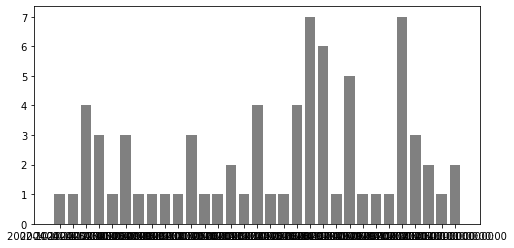

In [17]:
# Import necessary packages
# import os
# import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
# import seaborn as sns
# import pandas as pd
# import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
# sns.set(font_scale=1.5, style="whitegrid")

# Create figure and plot space
fig, ax = plt.subplots(figsize=(8, 4))

# Add x-axis and y-axis
ax.bar(begin_df1.index.values,
       begin_df1.iloc[:,2],
       color='grey')

# # Set title and labels for axes
# ax.set_xticklabels()
# plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


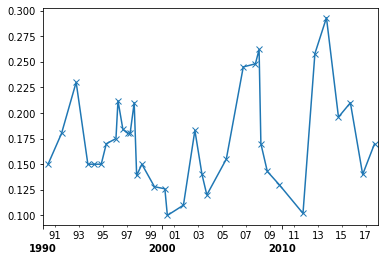

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates

class OffsetYearLocator(dates.YearLocator):
    def __init__(self, *args, **kwargs):
        self.offset = kwargs.pop("offset", 0)
        dates.YearLocator.__init__(self,*args, **kwargs)
    def tick_values(self, vmin, vmax):
        ymin = self.base.le(vmin.year) * self.base.step - self.offset
        ymax = self.base.ge(vmax.year) * self.base.step + (self.base.step-self.offset)
        ticks = [vmin.replace(year=ymin, **self.replaced)]
        while True:
            dt = ticks[-1]
            if dt.year >= ymax:
                return dates.date2num(ticks)
            year = dt.year + self.base.step
            ticks.append(dt.replace(year=year, **self.replaced))

def format_xaxis(ax):

    years = dates.YearLocator(10,month=1,day=1)
    years1=OffsetYearLocator(2,month=1,day=1, offset=1)
    dfmt = dates.DateFormatter('%Y')
    dfmt1 = dates.DateFormatter('%y')

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_minor_locator(years1)
    ax.xaxis.set_major_formatter(dfmt)
    ax.xaxis.set_minor_formatter(dfmt1)
    ax.get_xaxis().set_tick_params(which='major', pad=15)

    plt.setp(ax.get_xmajorticklabels(), rotation=0, weight="bold", ha="center")


df = pd.DataFrame.from_dict({'YData': {0: 0.15,  1: 0.18,  2: 0.23,  3: 0.15,  4: 0.15,  5: 0.15,  6: 0.17,  7: 0.175,  8: 0.212,  9: 0.184,  10: 0.18,  11: 0.18,  12: 0.21,  13: 0.139,  14: 0.15,  15: 0.128,  16: 0.126,  17: 0.1,  18: 0.11,  19: 0.183,  20: 0.14,  21: 0.12,  22: 0.155,  23: 0.245,  24: 0.248,  25: 0.262,  26: 0.17,  27: 0.143,  28: 0.13,  29: 0.102,  30: 0.258,  31: 0.293,  32: 0.196,  33: 0.21,  34: 0.14,  35: 0.17}, 
                             'Date': {0: '1990-06-10 00:00:00',  1: '1991-07-26 00:00:00',  2: '1992-10-15 00:00:00',  3: '1993-10-08 00:00:00',  4: '1994-04-07 00:00:00',  5: '1994-11-20 00:00:00',  6: '1995-04-24 00:00:00',  7: '1996-02-13 00:00:00',  8: '1996-04-15 00:00:00',  9: '1996-09-12 00:00:00',  10: '1997-02-13 00:00:00',  11: '1997-04-20 00:00:00',  12: '1997-08-23 00:00:00',  13: '1997-11-06 00:00:00',  14: '1998-04-15 00:00:00',  15: '1999-05-04 00:00:00',  16: '2000-03-17 00:00:00',  17: '2000-06-01 00:00:00',  18: '2001-10-05 00:00:00',  19: '2002-09-20 00:00:00',  20: '2003-04-25 00:00:00',  21: '2003-09-20 00:00:00',  22: '2005-05-07 00:00:00',  23: '2006-10-07 00:00:00',  24: '2007-10-13 00:00:00',  25: '2008-02-02 00:00:00',  26: '2008-03-28 00:00:00',  27: '2008-10-10 00:00:00',  28: '2009-10-10 00:00:00',  29: '2011-10-05 00:00:00',  30: '2012-10-03 00:00:00',  31: '2013-09-21 00:00:00',  32: '2014-09-23 00:00:00',  33: '2015-09-22 00:00:00',  34: '2016-10-01 00:00:00',  35: '2017-09-29 00:00:00'}})

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')

fig, ax = plt.subplots()

ax.plot('Date','YData', data=df, marker='x',ls='-')
# df.plot(kind='bar',ax=ax)
ax.set_xlim(pd.datetime(1990,1,1), pd.datetime(2018,1,1))

format_xaxis(ax)

plt.show()

# Ve cac hinh 

# Tạo thư mục lưu hình

In [57]:
import os
os.chdir('/content/drive/MyDrive')
outs=['outfig_210704','out_tab_210704']
for out in outs:
  if not os.path.exists(out):
    os.makedirs(out)

## Fig1 : Thời điểm xuất hiện nhiều trận hạn nhất

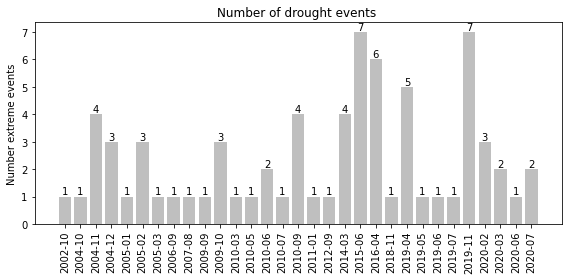

In [69]:
begin_df1['Date']=pd.to_datetime(begin_df1.Date)
yvalues=begin_df1.iloc[:,2].values
xvalues=begin_df1['Date'].dt.strftime('%Y-%m').values
fig=plt.Figure()
fig, ax = plt.subplots(figsize=(8, 4))
plt.bar(xvalues,yvalues,fill=True,color='gray',alpha=0.5)
plt.xticks(rotation=90)
# hien label on column
labels = ["%0.f" % i for i in yvalues]
# ax=plt.bar(x + 0.17, test_mae, width, label='Test')
rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 0, label,
            ha='center', va='bottom')

plt.title('Number of drought events ')
plt.ylabel('Number extreme events')
plt.tight_layout()
plt.savefig(outs[0]+'/'+'n_extreme_events.png',dpi=300)
